In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [80]:
# Go Pro Hero 10 parameters
gp_pixel_pitch_mm = 1.12e-3
gp_sensor_width_px = 5663
gp_focal_length_mm = 3

# Lucid Triton parameters
pixel_pitch_mm = 2.4e-3
focal_length_mm = 12
sensor_width_px = 5472

# Intel Realsense parameters
rs_pixel_pitch_mm = 3e-3
rs_focal_length_mm = 1.93
rs_sensor_width_px = 1280

# OAK-D parameters

target_size_mm = 50
target_depth_mm = 2500
target_size_px = (focal_length_mm * target_size_mm)/(pixel_pitch_mm * target_depth_mm)
rs_target_size_px = (rs_focal_length_mm * target_size_mm)/(rs_pixel_pitch_mm * target_depth_mm)
gp_target_size_px = (gp_focal_length_mm * target_size_mm)/(gp_pixel_pitch_mm * target_depth_mm)

We know that depth can be calculated by the following equation: 
$$z = \frac{fB}{xw},$$
where $f$ is the focal length, $B$ is the baseline disparity, $x$ is disparity of the feature in the image in pixels, and $w$ is the pixel pitch (equivalent to the width of a single pixel assuming no dead space in between). 

We can use this to calculate the length of an object given the size $p$ (in pixels) it occupies on the image. Using similar triangles, we know that
$$\frac{l}{z} = \frac{pw}{f},$$

Trivially, we can derive $l$:
$$l = \frac{zpw}{f} = \frac{Bp}{x}.$$

The derivative of this with respect to disparity gives us: 

$$\frac{\partial l}{\partial x} = -\frac{Bp}{x^2}$$

Using equation 1 to express $x$ in terms of $z$, we get: 

$$\frac{\partial l}{\partial x}  = -\frac{z^2w^2p}{f^2B}$$


In [81]:
baseline_mm = np.linspace(50,500, num=256)

length_deriv = -(target_depth_mm * pixel_pitch_mm/focal_length_mm)**2 * target_size_px / baseline_mm

rs_length_deriv = -(target_depth_mm * rs_pixel_pitch_mm/rs_focal_length_mm)**2 * rs_target_size_px / baseline_mm

gp_length_deriv = -(target_depth_mm * gp_pixel_pitch_mm/gp_focal_length_mm)**2 * gp_target_size_px / baseline_mm

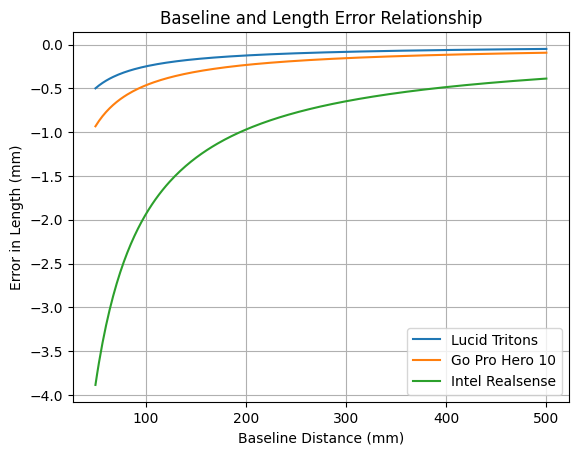

In [82]:
plt.plot(baseline_mm, length_deriv, label="Lucid Tritons")
plt.plot(baseline_mm, rs_length_deriv, label="Go Pro Hero 10")
plt.plot(baseline_mm, gp_length_deriv, label="Intel Realsense")
plt.legend()
plt.xlabel("Baseline Distance (mm)")
plt.ylabel("Error in Length (mm)")
plt.title(f"Baseline and Length Resolving Power Relationship")
plt.grid()